In [1]:
import pandas as pd

In [2]:
path='/content/drive/MyDrive/Restaurant review /Reviewsnew.csv'

In [3]:
df=pd.read_csv(path)

# data

In [4]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,the food is worst,0
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1
6,Now I am getting angry and I want my damn pho.,0
7,Honeslty it didn't taste THAT fresh.),0
8,The potatoes were like rubber and you could te...,0
9,The fries were great too.,1


In [5]:
df.shape

(1000, 2)

# Data cleaning

# Remove splecial characters

In [6]:
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace('[^\w\s]', '')
df['Review'] = df['Review'].str.replace('\d', '')

<ipython-input-6-124ce5b7a66d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]', '')
<ipython-input-6-124ce5b7a66d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('\d', '')


In [7]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
drops = pd.Series(' '.join(df['Review']).split()).value_counts()[-250:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from textblob import Word
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


# After removing stopwords and performing lemmatization

In [11]:
df['Review']

0                                        wow loved place
1                                             food worst
2                                             crust good
3                                    tasty texture nasty
4      stopped late may bank holiday rick steve recom...
                             ...                        
995                  cant tell disappointed dissapointed
996                            think food flavor texture
997                                       food delicious
998                 overall impressed would go backwaste
999           food good expected worst food dissapointed
Name: Review, Length: 1000, dtype: object

In [12]:
l=[]
for i in range(0,1000):
    s=df['Review'][i]
    l.append(s)
print(l)

['wow loved place', 'food worst', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty didnt taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberrymmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommendeddelicious food', 'waitress little slow servicedissapointed', 'place worth time let alone vega', 'like', 'burrittos blah', 'food amazing', 'service also cuteamazingdelicious', 'could care le interior beautiful', 'performed', 'thats rightthe red velvet cakeohhh stuff good', 'name', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'als

# Finding Term Frequency

In [13]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [14]:
tf.columns = ["words", "tf"]
tf.head(10)

,words,tf
0,wow,3.0
1,loved,10.0
2,place,112.0
3,food,144.0
4,worst,18.0
5,crust,2.0
6,good,93.0
7,tasty,11.0
8,texture,3.0
9,nasty,3.0


In [15]:
tf.sort_values("tf", ascending = False)

,words,tf
3,food,144.0
2,place,112.0
6,good,93.0
43,service,84.0
20,great,69.0
...,...,...
505,lox,1.0
361,largely,1.0
1027,gc,1.0
1028,sample,1.0


# Unique words in given data

In [16]:
tf["words"].nunique()

1638

# to plot graph based on words

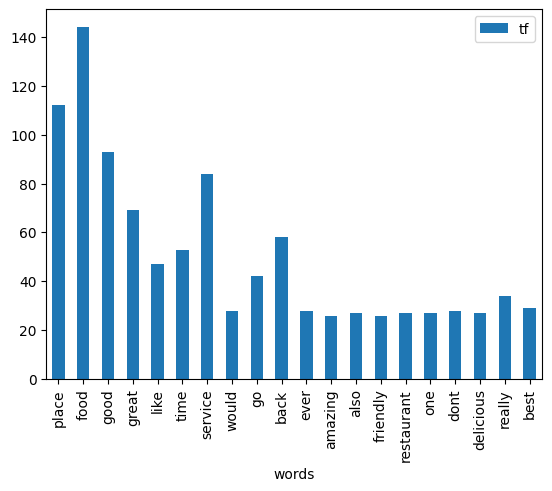

In [17]:
import matplotlib.pyplot as plt
tf[tf["tf"] > 25].plot.bar(x="words", y="tf")
plt.show()

# Word Cloud for resultant data after data cleaning

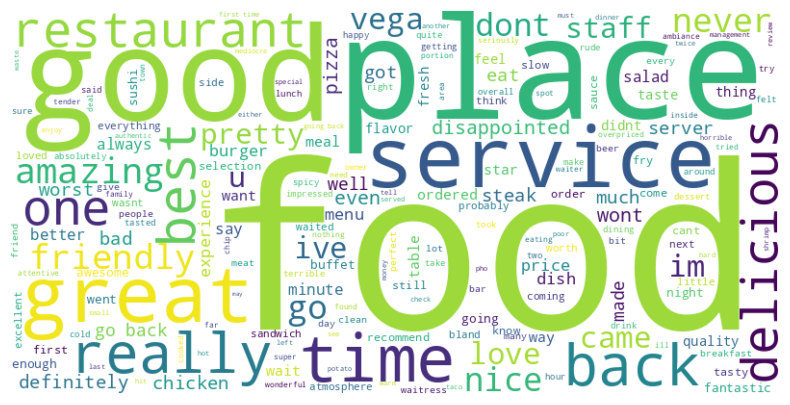

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(word_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
generate_wordcloud(l)

In [ ]:
import nltk
nltk.download('vader_lexicon')
#vader lexicon contain list of words and corresponding sentiment scores,which indicates how positive,negative,neutral


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was amazing")

# #compound score indicates postive and negative,if compound score >0 it is positive else it is negative

In [38]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1    {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'comp...
2    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
3    {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
4    {'neg': 0.131, 'neu': 0.414, 'pos': 0.455, 'co...
5    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
6    {'neg': 0.645, 'neu': 0.215, 'pos': 0.14, 'com...
7    {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'comp...
8    {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: Review, dtype: object

In [ ]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
df.head(10)

In [ ]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [ ]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] >= 0 else "neg")
df.head(10)

In [ ]:
df.groupby("sentiment_label")["Liked"].mean()

# Creating Bag of Words

In [ ]:
# Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
import joblib
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(l).toarray()
y = df.iloc[:, 1].values

# Creating a pickle file for the CountVectorizer model
#joblib.dump(cv, "cv.pkl")


In [ ]:
X

In [ ]:
y[1:100]

# Training the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Fitting Naive Bayes to the Training set
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


In [ ]:
# Creating a pickle file for the Multinomial Naive Bayes model
#joblib.dump(classifier, "model.pkl")


# Prediction

In [ ]:
y_pred=classifier.predict(X_test)

# Confusion Matrix

<Axes: >

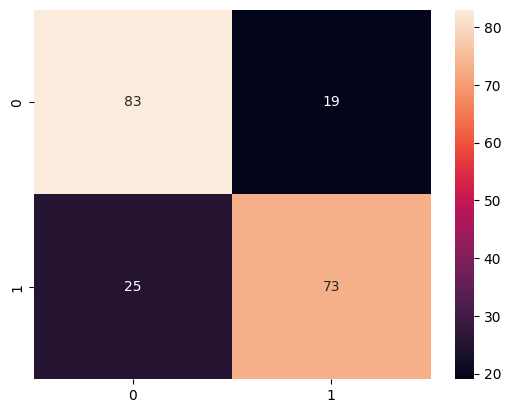

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

# Resultant Accuracy

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.78

# Give test data

In [41]:
import numpy as np
x_pred=np.array(['the food is soo bad'])
x_pred=cv.transform(x_pred).toarray()
if(classifier.predict(x_pred)==1):
  print("Positive Review")
else:
  print("Negative Review")



Negative Review
